## Basic EDA on dataset

This notebook has some very preliminary analysis of the data which supported some key modeling decsisions. It also contains some of the original work behind a few of the transformations and the first pass at assessing the transformation accuracy with Linear Regression models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
import cv2
import time

## 1. Load the data

In [2]:
# file kfkd.py
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

#C:\Users\Jennifer\Documents\Berkeley\W207\Projects\final_team
#FTRAIN = '~/data/kaggle-facial-keypoint-detection/training.csv'
#FTEST = '~/data/kaggle-facial-keypoint-detection/test.csv'
FTRAIN = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\training.csv"
#'~\Documents\Berkeley\W207\Projects\final_team\training.csv'
FTEST = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\test.csv"
#'~\Documents\Berkeley\W207\Projects\final_team\test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(fname)  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))



left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

# 2. View Raw Data

In [2]:
# Testing data has no targets available
read_csv(FTEST).head(1)

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...


In [113]:
df_train = read_csv(FTRAIN)
print (type(df_train))
#print(df_train)

df_test = read_csv(FTEST)


<class 'pandas.core.frame.DataFrame'>


In [198]:
print(X.shape)

(2140, 9216)


In [217]:
mini_train_labels = df_train.ix[0:10, 0:30]
print (mini_train_labels)

    left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0           66.033564          39.002274           30.227008   
1           64.332936          34.970077           29.949277   
2           65.057053          34.909642           30.903789   
3           65.225739          37.261774           32.023096   
4           66.725301          39.621261           32.244810   
5           69.680748          39.968748           29.183551   
6           64.131866          34.290040           29.578953   
7           67.468893          39.413452           29.355961   
8           65.802880          34.755200           27.475840   
9           64.121231          36.740308           29.468923   
10          65.230189          34.342642           28.802717   

    right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0            36.421678                59.582075                39.647423   
1            33.448715                58.856170                35.274349   
2  

# EDA on missing values

Daniel's tutorial focused mainly on the complete cases, but that was only 1.9k examples out of a possible 7,049 or about one quarter of the total. As a team we were interested in building specialist models for each feature of the face to increase the sample size, but before we could do that with confidence, we looked at the distribution of the labeled data to see if there were any missing patterns or features that should be clustered together. As it turns out, the data fit into 2 different structures, the ones with all 15 features labeled, and the ones with 4 features (eyes, nose and part of the mouth labeled).

In [12]:
train_labels = df_train.ix[:, 0:30]

C:\Users\Jennifer\Anaconda2\envs\MLpy\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [13]:
train_labels.shape

(7049, 30)

In [ ]:
nose_labels = df_train.ix[:,20:22]
print(nose_labels.head(5))
print(type(nose_labels))

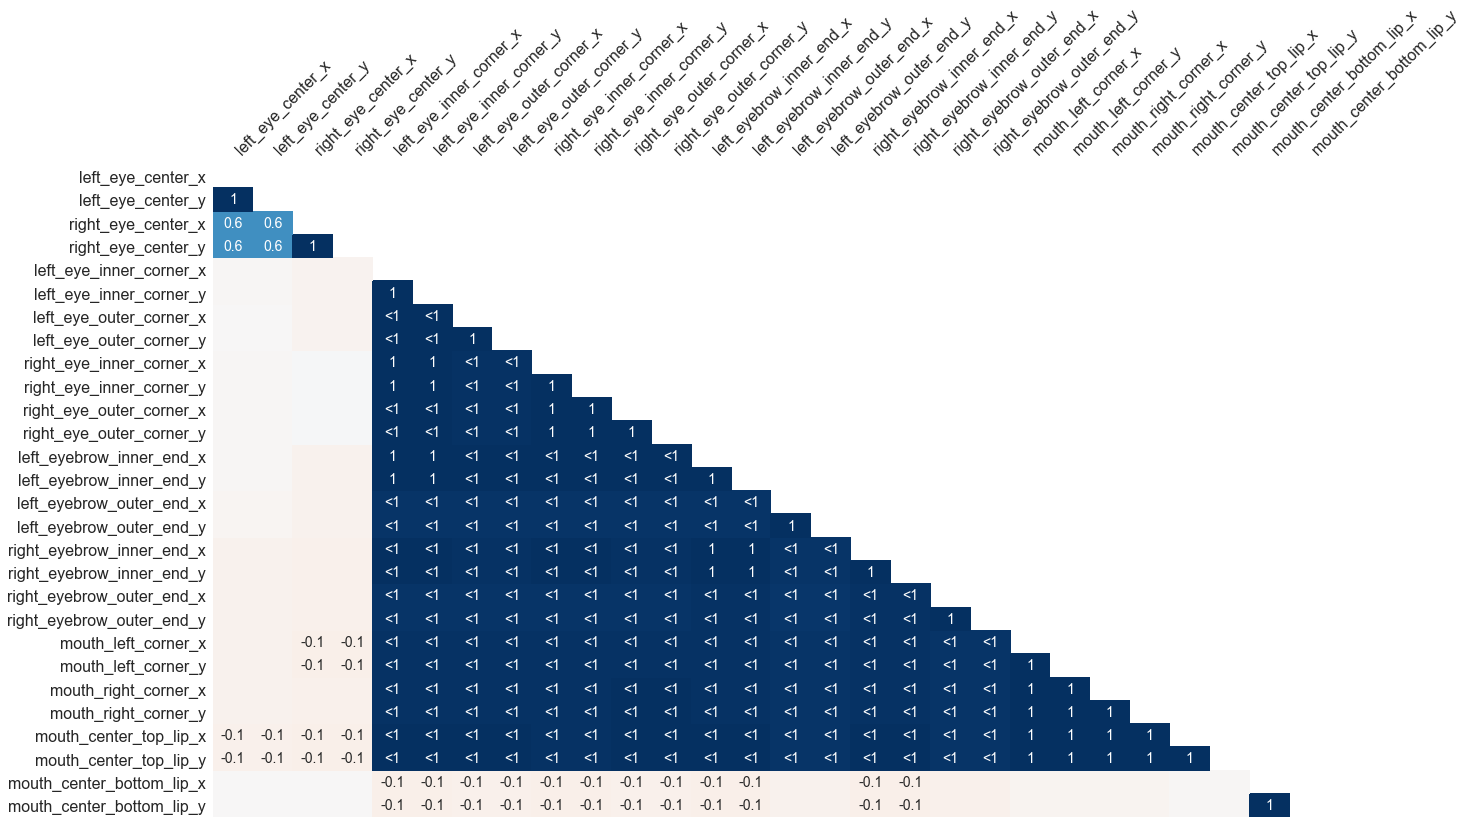

In [221]:
heatmap(train_labels)

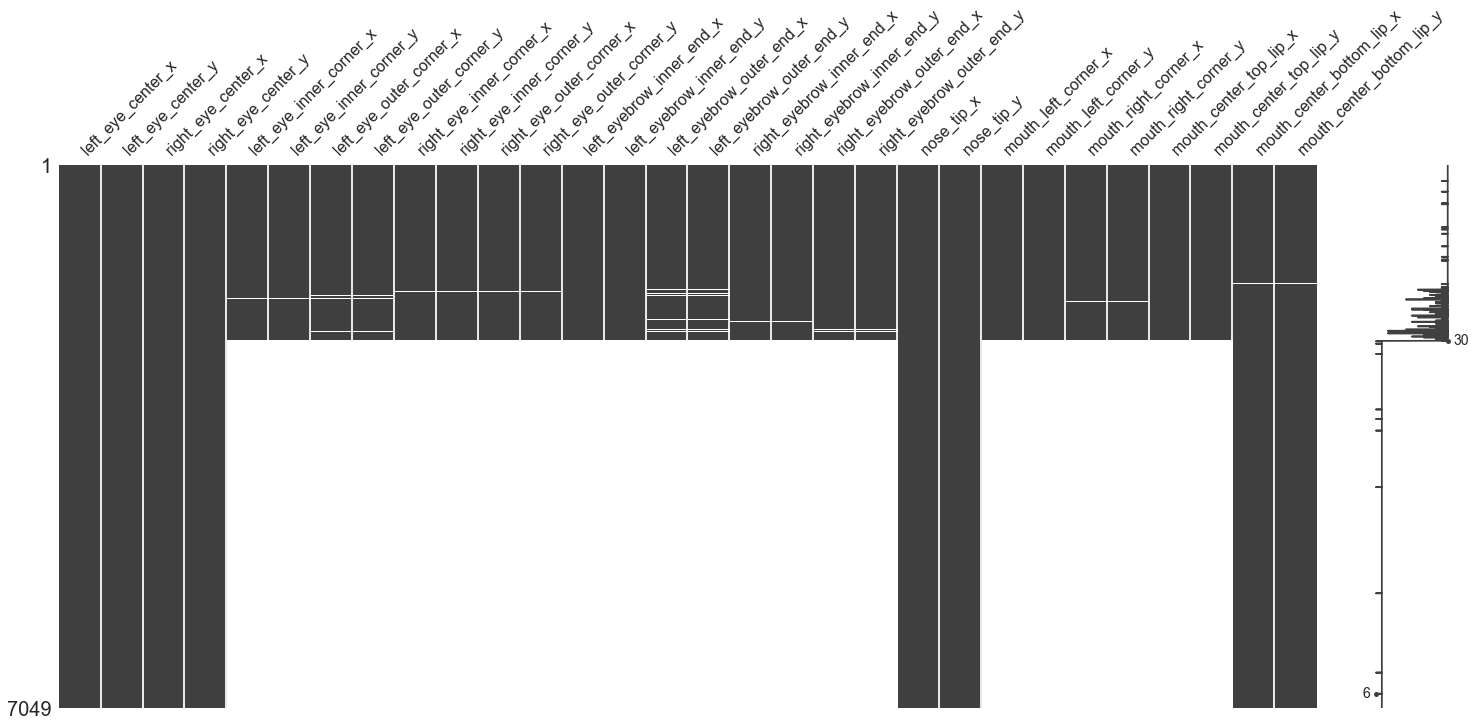

In [225]:
matrix(train_labels,7049)

In [476]:
#create a flag for the 2 different datasets (JUST EDA, its overwritting the origianl col.)
train_labels2 = train_labels['mouth_left_corner_y'].isnull().astype(int)
#print(train_labels2) #2.shape())

train_labels3 = pd.concat([train_labels, train_labels2], axis =1)
#print(train_labels3)

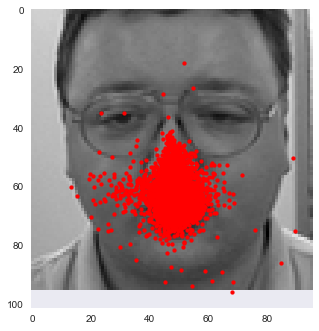

In [251]:
#look at one pic with all Possible nose tips
img = X[21].reshape(96,96)
plt.imshow(img,cmap='gray')
# put a red dot, size 40, at 2 locations:
plt.scatter(x=nose_labels.ix[:,0], y=nose_labels.ix[:,1], c='r', s=15)
plt.grid(False)

We considered removing outliers from the training dataset, these pictures had faces that were off center, multiple people in a photo or they might not have even been a photo (one was four posters), but ultimately we didn't have any way of knowing if the kaggle holdout dataset contained similar outliers so we left them in.

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[  48.   75.  129. ...,  254.  255.  255.]


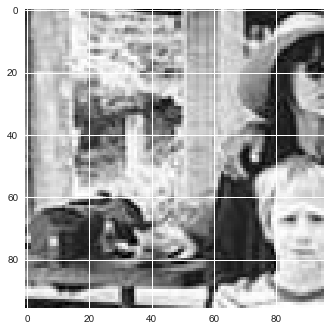

In [376]:
##Outliers
highest_nose = train_labels["nose_tip_x"].max()
example = train_labels3[train_labels["nose_tip_x"]==highest_nose]
ex = df_train.ix[4263,-1:]
print (type(ex))
ex2 =ex.values.flatten()
print (type(ex2))
ex3 = ex.apply(lambda im: np.fromstring(im, sep=' '))
#img = (map(int, ex2.split(' '))).reshape(96,96)
#img = np.asarray(list(ex)).reshape(96,96)
print (ex3[0])
ex4 = ex3[0].reshape(96,96)
plt.imshow(ex4,cmap='gray')

In [353]:
#grab the image portion of the train data (from the very first import)
df_train.ix[4263,-1:]

Image    48 75 129 191 201 185 186 173 159 174 185 172 ...
Name: 4263, dtype: object

The nose tip seems different across datasets (meaning those with 15 features vs 4 features)

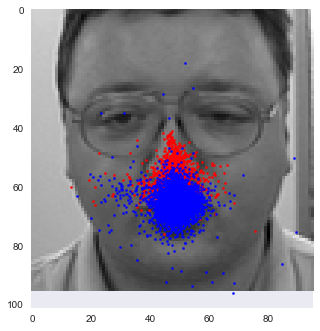

In [293]:
#look at one pic with all Possible nose tips
img = X[21].reshape(96,96)
plt.imshow(img,cmap='gray')
# put a red dot, size 40, at 2 locations:
#df_graph[df_graph[:,0]!=0,1]
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==0,20], y=train_labels3.ix[train_labels3.iloc[:,30]==0,21], c='r', s=5)
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==1,20], y=train_labels3.ix[train_labels3.iloc[:,30]==1,21], c='b', s=5)
plt.grid(False)

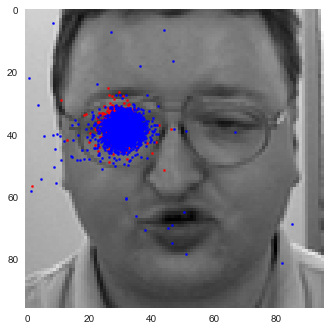

In [294]:
#look at one pic with all Possible nose tips
img = X[21].reshape(96,96)
plt.imshow(img,cmap='gray')
# put a red dot, size 40, at 2 locations:
#df_graph[df_graph[:,0]!=0,1]
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==0,2], y=train_labels3.ix[train_labels3.iloc[:,30]==0,3], c='r', s=5)
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==1,2], y=train_labels3.ix[train_labels3.iloc[:,30]==1,3], c='b', s=5)
plt.grid(False)

We might want to pull instances where there is an extra label for the set with only 4 points
(assuming my flagging is okay)

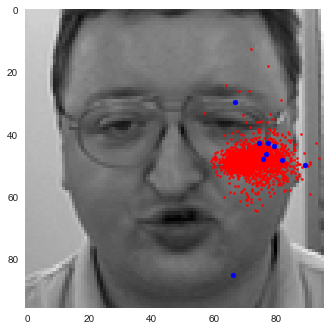

In [299]:
#look at one pic with all Possible nose tips
img = X[21].reshape(96,96)
plt.imshow(img,cmap='gray')
# put a red dot, size 40, at 2 locations:
#df_graph[df_graph[:,0]!=0,1]
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==0,27], y=train_labels3.ix[train_labels3.iloc[:,30]==0,28], c='r', s=5)
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==1,27], y=train_labels3.ix[train_labels3.iloc[:,30]==1,28], c='b', s=25)
plt.grid(False)

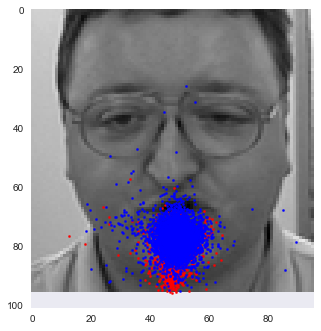

In [304]:
#look at mouth center bottom (which our model also does not perform well on)
img = X[21].reshape(96,96)
plt.imshow(img,cmap='gray')
# put a red dot, size 40, at 2 locations:
#df_graph[df_graph[:,0]!=0,1]
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==0,28], y=train_labels3.ix[train_labels3.iloc[:,30]==0,29], c='r', s=5)
plt.scatter(x=train_labels3.ix[train_labels3.iloc[:,30]==1,28], y=train_labels3.ix[train_labels3.iloc[:,30]==1,29], c='b', s=5)
plt.grid(False)

# 3. Apply transformations to a single picture

You can probably skip over this section if you already read the data augmentation notebook

[ 0.12941177  0.21960784  0.34509805 ...,  0.21176471  0.22352941
  0.23137255]
(2140, 9216)


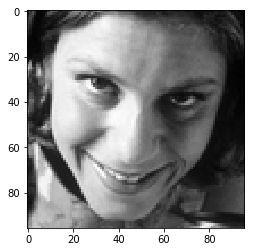

In [21]:
#look at one pic
print (X[1])
print (X.shape)
img = X[1].reshape(96,96)
plt.imshow(img,cmap='gray')

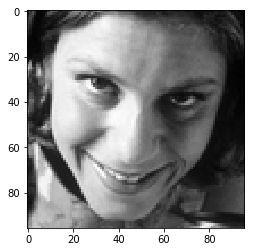

In [24]:
#Photo dodging function (lightening)
def burnV2(img, mask):
    return 255 -cv2.divide(255-image, 255-mask, scale=256)
plt.imshow(img,cmap='gray')

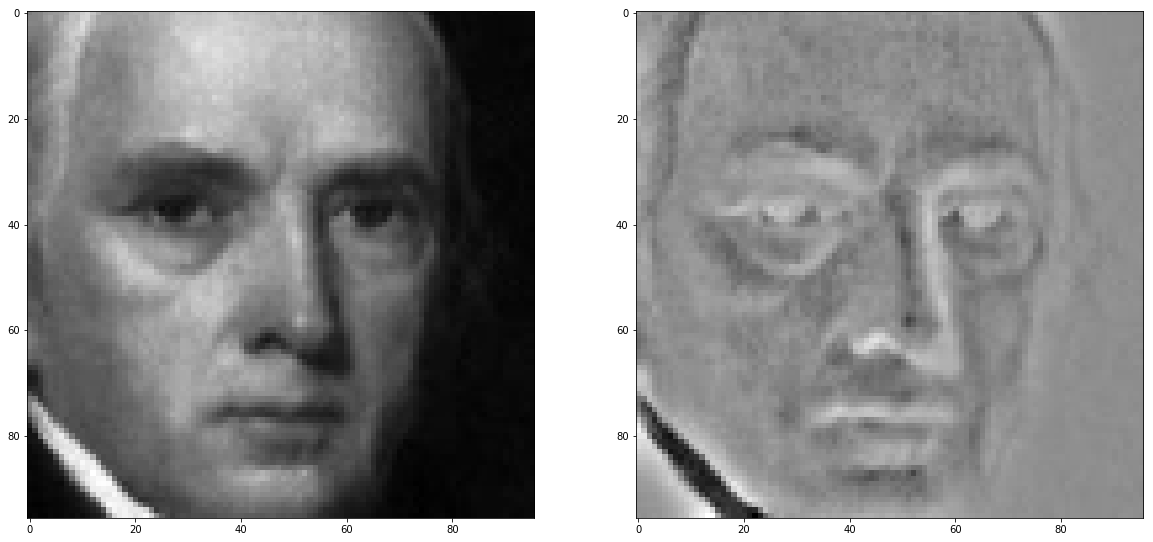

In [96]:
#can mess around with the parameters on the blur and inverse

#function to transform the images
def render(img):
    img_inv = 255 - img #inverts the colors
    img_blur = cv2.GaussianBlur(img_inv, (21,21), 0, 0) #heavy blur on the inverse
    img_blend = cv2.divide(img_inv, img_blur, scale=256) #merges the strong blur with the inverted colors
    return img_blend

#pick an image to mess with
img = X[27].reshape(96,96)
#call function
result = render(img)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(result,cmap='gray')

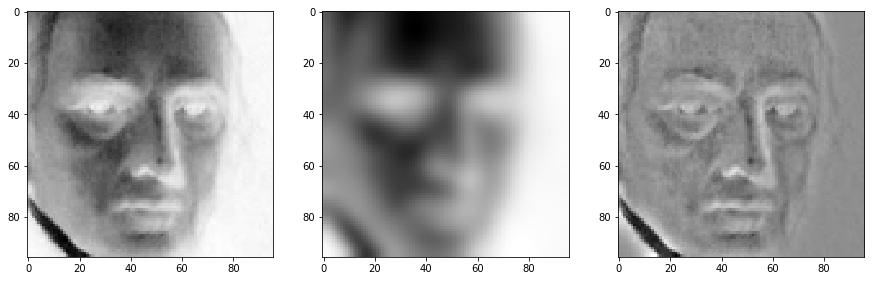

In [97]:
#A look under the hood of the transformation function
fig = plt.figure(figsize=(15, 15))
img = X[27].reshape(96,96)

img_inv = 255 - img #inverts the colors
fig.add_subplot(1,3,1).imshow(img_inv,cmap='gray')
img_blur = cv2.GaussianBlur(img_inv, (21,21), 0, 0) #heavy blur
fig.add_subplot(1,3,2).imshow(img_blur,cmap='gray')
img_blend = cv2.divide(img_inv, img_blur, scale=256) #merges the strong blur with the inverted colors
fig.add_subplot(1,3,3).imshow(img_blend,cmap='gray')



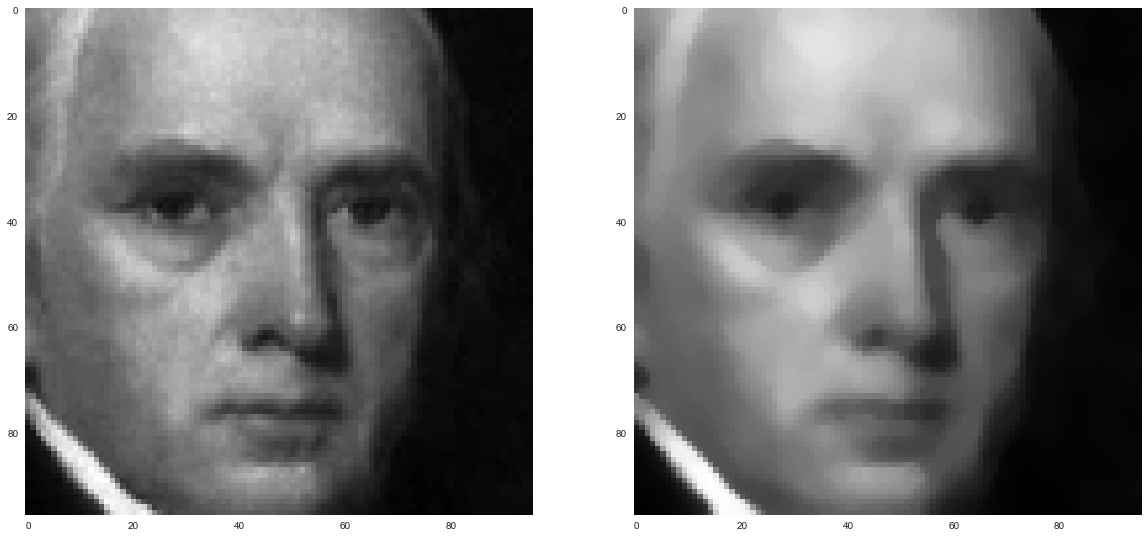

In [307]:
#Applying a Median Blur
def render(img):
    img_blur = cv2.medianBlur(img, 5)
    img_blend = cv2.divide(img, img_blur, scale=256)
    #img_edge = cv2.adaptiveThreshold(img_blend,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
    return img_blur

#pick an image to mess with
img = X[27].reshape(96,96)
#call function
result = render(img)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
plt.grid(False)
fig.add_subplot(1,2,2).imshow(result,cmap='gray')
plt.grid(False)

In [39]:
import math
import scipy.misc
from scipy.misc.pilutil import Image

(512, 512, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ..., 
 [0 0 0]
 [0 0 0]
 [0 0 0]]


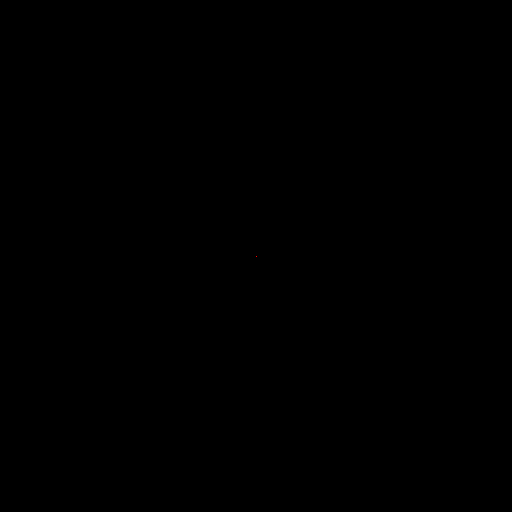

In [127]:
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
print (data.shape)
print (data[1])
Image.fromarray(data, 'RGB')


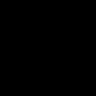

In [125]:
from PIL import Image
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]

pic = X[27]
my_array = pic.reshape(96,96).astype('uint8')*255
imgT = Image.fromarray(my_array)
imgT

In [148]:

Image.fromarray(X[27].reshape(96,96), 'RGB')
im = scipy.misc.toimage(X[27].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)

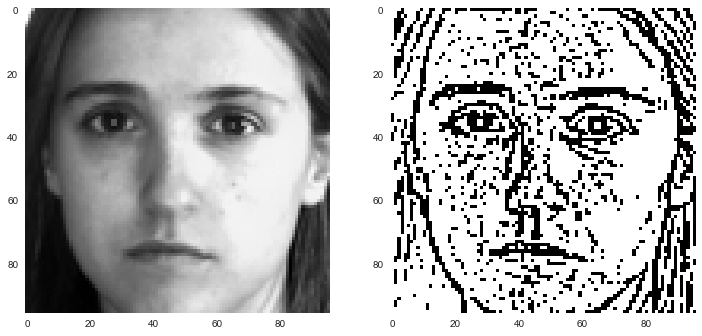

In [470]:
#Applying an adaptive filter (considers a 3x3 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
im = scipy.misc.toimage(X[22].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)
img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 2)

#compare the results visually
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1).imshow(im,cmap='gray')
plt.grid(False)
fig.add_subplot(1,2,2).imshow(img_edge,cmap='gray')
plt.grid(False)

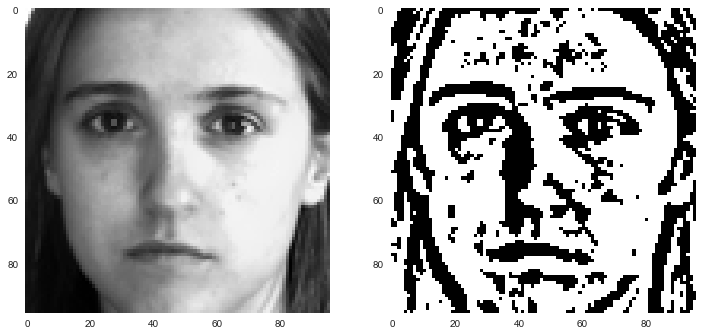

In [469]:
#Applying an adaptive filter (considers a 9x9 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
im = scipy.misc.toimage(X[22].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)
img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

#compare the results visually
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1).imshow(im,cmap='gray')
plt.grid(False)
fig.add_subplot(1,2,2).imshow(img_edge,cmap='gray')
plt.grid(False)

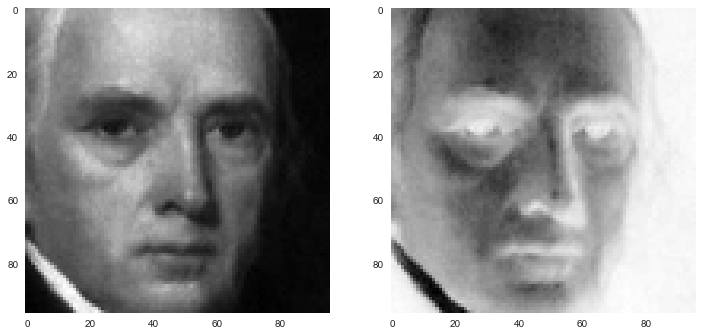

In [473]:
###Contrast stretching

#original image
img = X[27].reshape(96,96)

#contrast boosting
b = img.min().astype(float)
a = img.max().astype(float)
c = img.astype(float)
im2 = 255*(c-a)/(b-a)
img2 = im2.reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
plt.grid(False)
fig.add_subplot(1,2,2).imshow(img2,cmap='gray')
plt.grid(False)


In [189]:
####Histogram Equalization

##not the best use of time, but I'd love to come back to it...

print (X)
im1 = scipy.misc.toimage(X[22].reshape(96,96)
#im.save("foobar.png")
#src = cv2.imread("foobar.png", 0)
#imgl = scipy.misc.fromimage(im1)

#fl = img1.flatten()
#im = scipy.misc.toimage(X[22].reshape(96,96))
#struggle = X[22]                        
#print(struggle_bus)                        
#hist, bins = np.histogram(X[22],256,[0,255])
#cummulative distribution calc'ed
cdf = hist.cumsum()

fl = X[22].reshape(1,9216)
print (fl.shape)
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
im2 = cdf[fl]
img2 = im2.reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(img2,cmap='gray')


SyntaxError: invalid syntax (<ipython-input-189-f4efc83c56cd>, line 15)

# Building baseline accuracy for prediciting nose

Initially I wanted a quick and dirty way of assessing how the transformations did. I prioritized getting accuracy measures over additional transformations because I knew that without a means to measure their impact they would all be useless because the model would take forever to run them all. I also wanted to expand the scope of the dataset to include more than the 1.9 of complete cases, which meant that I couldn't use Daniel's load function so I wrote code to rework the data. Then I ran a linear regression on the nose tip because that is where our model performed worst.

In [451]:
#Make Mini datasets
mini_train_data = df_train.iloc[0:1000,-1:]
#print (mini_train_data)
# The Image column has pixel values separated by space; convert
# the values to numpy arrays:
mini_train_data['Image'] = mini_train_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
#print (mini_train_data)
mini_train_labels = df_train.iloc[0:1000,20] #needs shuffle
mini_test_data = df_train.iloc[1001:1251,-1:]#needs shuffle
mini_test_data['Image'] = mini_test_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
#print (mini_test_data)
print(mini_train_data.shape)
print(mini_test_data.shape)

(1000, 1)
(250, 1)


In [399]:
print(mini_train_labels.shape)
print(type(mini_train_data))
print (mini_test_labels.shape)


(1000,)
<class 'pandas.core.frame.DataFrame'>


In [479]:
#convert 1D array to 2k
mini_train_data2 = np.vstack(mini_train_data['Image'].values) / 255.  # scale pixel values to [0, 1]
mini_train_data2 = mini_train_data2.astype(np.float32)
print(mini_train_data2.shape)
#same thing for test data
mini_test_data2 = np.vstack(mini_test_data['Image'].values) / 255.  # scale pixel values to [0, 1]
mini_test_data2 = mini_test_data2.astype(np.float32)

#make test labes
mini_test_labels = df_train.iloc[1001:1251,20]

(1000, 9216)


# Applying LR to test the effectiveness of the transformations
-to show the transformations ran smoothly 
-to test for initial acuracy gains with each transformation(and prioritize NN accordingly)
-to parameter tune the pic transformations (ended up switching to NN for assessing accuracy and to reduce debugging in AWS)

Original Data

In [480]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(mini_train_data2, mini_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(mini_test_data2)

#accuracy Calcs
RSME = LR_model.score(mini_test_data2,mini_test_labels)
wrong_prediction = (test_predicted_labels != mini_test_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -0.14988013472


Transformation 1 accuracy (little out of order because the code for the transformations is below)

In [461]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(mini_train_transformed, mini_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(mini_test_transformed)

#accuracy Calcs
RSME = LR_model.score(mini_test_transformed,mini_test_labels)
wrong_prediction = (test_predicted_labels != mini_test_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -0.324507807054


# Data prep - incorporating the Index from Legg
While the train/test split is imbalanced, it is consistent throughout project and enables comparison with the NN model's accuracy. Unfortunately there was not enought time to modify and re-run NN to change the mix. So the accuracy calcs from here reflect only the 1.9k complete cases. 

In [140]:
eam_dev = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\dev_indices.txt"
tteam_train = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\train_indices.txt"

In [141]:
team_train_index = read_csv(team_train, names =("A"))
team_dev_index = read_csv(team_dev, names =("A"))

In [142]:
team_train_index.head()
#team_train_index.shape

,A
0,401
1,1370
2,253
3,2150
4,1385


In [143]:
team_dev_index.head()

,A
0,1631
1,175
2,1045
3,1667
4,1191


In [144]:
type(team_train_index)

pandas.core.frame.DataFrame

In [145]:
team_train_index.iloc[:,0]

0        401
1       1370
2        253
3       2150
4       1385
5        688
6        461
7       1331
8        998
9       2059
10         6
11      1560
12       260
13       315
14      1802
15      1277
16      1688
17       967
18       658
19      1772
20      1699
21        98
22      2232
23      1978
24       962
25      2013
26       393
27       448
28      1592
29       161
        ... 
6819    7019
6820    7020
6821    7021
6822    7022
6823    7023
6824    7024
6825    7025
6826    7026
6827    7027
6828    7028
6829    7029
6830    7030
6831    7031
6832    7032
6833    7033
6834    7034
6835    7035
6836    7036
6837    7037
6838    7038
6839    7039
6840    7040
6841    7041
6842    7042
6843    7043
6844    7044
6845    7045
6846    7046
6847    7047
6848    7048
Name: A, Length: 6849, dtype: int64

In [146]:
df_train.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [147]:
#don't need, using team DEV set
#df_test.head(2)

In [148]:
df_team_train = df_train.ix[team_train_index.iloc[:,0]]
df_team_train.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
401,64.510222,36.470519,29.552000,34.616889,58.154074,36.735407,70.071704,37.794963,35.113481,36.205630,...,55.346963,56.565333,73.547259,34.319407,73.018074,46.853926,68.616296,45.371259,80.376889,146 128 97 58 44 37 39 36 34 30 31 41 31 44 79...
1370,65.737371,33.348343,26.052686,31.473257,58.550400,34.598057,72.299314,34.598057,32.927314,33.348343,...,56.471657,61.050171,75.220114,27.615086,75.532800,44.801486,70.845600,44.488800,80.844686,46 43 42 36 38 41 39 33 31 28 30 42 47 40 37 4...


In [181]:
df_team_train.iloc[:,0]

401     64.510222
1370    65.737371
253     66.283059
2150    65.672854
1385    64.567695
688     65.953255
461     68.412817
1331    62.928894
998     65.173770
2059    65.669895
6       64.131866
1560    66.373479
260     66.926907
315     68.708791
1802    65.467229
1277    66.355525
1688    64.732263
967     67.136276
658     66.794024
1772    73.567918
1699    66.826453
98      71.110642
2232    64.603001
1978    67.191171
962     66.021429
2013    64.153785
393     66.057664
448     69.009155
1592    66.652409
161     64.856054
          ...    
7019    65.608426
7020    61.997236
7021    64.906070
7022    67.045141
7023    60.202057
7024    72.226237
7025    67.724141
7026    63.013300
7027    67.277867
7028    65.840046
7029    69.463223
7030    64.392940
7031    67.367709
7032    68.320900
7033    66.162021
7034    66.651927
7035    70.504914
7036    71.258174
7037    69.616217
7038    64.615524
7039    69.229935
7040    63.352951
7041    65.711151
7042    67.929319
7043    66

In [149]:
df_team_dev = df_train.ix[team_dev_index.iloc[:,0]]
df_team_dev.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1631,64.491468,36.682220,34.606327,40.254668,57.649633,38.177157,72.157005,36.220904,40.302491,39.814621,...,54.872698,66.083949,65.212300,36.003847,67.318303,51.761086,67.918367,51.983332,71.296506,41 56 42 55 46 36 40 60 44 30 29 35 42 33 33 3...
175,68.171024,37.394526,28.757742,36.368383,60.781321,37.599847,74.124402,39.241952,35.326622,36.779024,...,53.816957,63.449569,78.861014,29.579024,77.834411,45.180172,73.934239,44.974852,88.714105,165 166 168 169 172 169 166 157 109 49 41 28 2...


In [150]:
print (df_team_train.shape)
print (df_team_dev.shape)

(6849, 31)
(200, 31)


In [151]:
# the values to numpy arrays:
df_team_train['Image'] = df_team_train['Image'].apply(lambda im: np.fromstring(im, sep=' '))
#convert 1D array to 2k
df_team_train2 = np.vstack(df_team_train['Image'].values) / 255.  # scale pixel values to [0, 1]
df_team_train2 = df_team_train2.astype(np.float32)

print(df_team_train2.shape)

#same for dev
#############################
# the values to numpy arrays:
df_team_dev['Image'] = df_team_dev['Image'].apply(lambda im: np.fromstring(im, sep=' '))
#convert 1D array to 2k
df_team_dev2 = np.vstack(df_team_dev['Image'].values) / 255.  # scale pixel values to [0, 1]
df_team_dev2 = df_team_dev2.astype(np.float32)
print(df_team_dev2.shape)

(6849, 9216)
(200, 9216)


In [174]:
print (df_team_train2[1:15])

[[ 0.18039216  0.16862746  0.16470589 ...,  1.          1.          1.        ]
 [ 0.99607843  0.99215686  0.99215686 ...,  0.31764707  0.36862746
   0.36862746]
 [ 0.11764706  0.07450981  0.03921569 ...,  0.27450982  0.26274511
   0.18039216]
 ..., 
 [ 0.69411767  0.70588237  0.70588237 ...,  0.27843139  0.27058825
   0.25490198]
 [ 0.62352943  0.59607846  0.58039218 ...,  0.45882353  0.4627451
   0.46666667]
 [ 0.90588236  0.84313726  0.65098041 ...,  0.25098041  0.23529412
   0.27450982]]


Make labels for LR

In [106]:
#make test label for just the nose (where we have the most problems)
df_team_train_labels = df_team_train.iloc[:,20]
df_team_train_labels.head(3)

401     47.829926
1370    43.864114
253     49.248000
Name: nose_tip_x, dtype: float64

In [119]:
##samle thing for dev
#make test label for just the nose (where we have the most problems)
df_team_dev_labels = df_team_dev.iloc[:,20]
df_team_dev_labels.head(3)

1631    54.036114
175     45.590354
1045    44.156571
Name: nose_tip_x, dtype: float64

Make labels for mini NN

In [179]:
df_team_train_labelsNN = df_team_train.iloc[:,0:30]
df_team_train_labelsNN.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
401,64.510222,36.470519,29.552000,34.616889,58.154074,36.735407,70.071704,37.794963,35.113481,36.205630,...,47.829926,55.346963,56.565333,73.547259,34.319407,73.018074,46.853926,68.616296,45.371259,80.376889
1370,65.737371,33.348343,26.052686,31.473257,58.550400,34.598057,72.299314,34.598057,32.927314,33.348343,...,43.864114,56.471657,61.050171,75.220114,27.615086,75.532800,44.801486,70.845600,44.488800,80.844686
253,66.283059,38.173271,33.474353,35.649529,60.604235,38.173271,71.014588,38.173271,37.260000,36.595906,...,49.248000,58.362988,60.604235,72.874588,32.528471,72.874588,46.668000,70.015059,46.426588,81.393882


In [180]:
df_team_train_labelsNN.to_csv("Train_labels.csv")

# data augmentations

Again, if you read through the data augmentation workbook you can skip this section.
-*Transformation 1
-*outputs a csv for the newly transformed images (we tried transferring files in the cvs format but that was way too clunky so we switched to a code based approach

 run time (H:M:S) 00:00:00


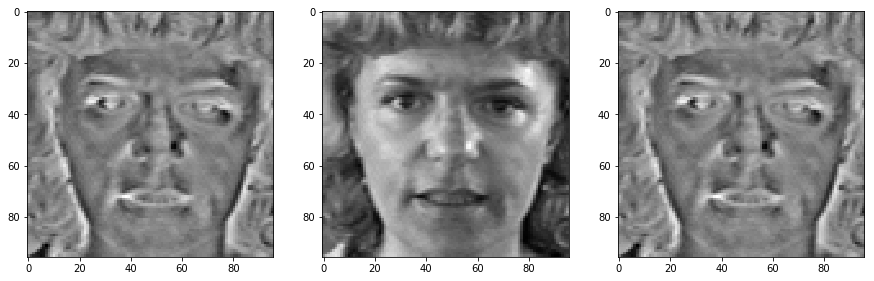

In [103]:
#function to transform the images
def render(img):
    img_inv = 255 - img #inverts the colors
    img_blur = cv2.GaussianBlur(img_inv, (21,21), 0, 0) #heavy blur on the inverse
    img_blend = cv2.divide(img_inv, img_blur, scale=256) #merges the strong blur with the inverted colors
    return img_blend

#starts the timer
start_time = time.time()

#df_train_trans = df_team_train2
#apply transformation
for i in range(0,6849):
    #pick an image to mess with
    img = df_team_train2[i].reshape(96,96)
    #call function
    result = render(img)
    df_train_trans[i] = result.reshape(1, 9216)
   # print (df_train_trans[i])
#mini_train_transformed = mini_train_data.applymap(render)
#mini_train_transformed = np.hstack(mini_train_transformed['Image'].values).T  # scale pixel values to [0, 1]#T transposes the col

#stop timer
end_time = time.time()
run_time = time.strftime("%H:%M:%S",time.gmtime(end_time - start_time))
print (' run time (H:M:S) ' + str(run_time))


###########################
#pick an image to mess with
img = df_team_train2[27].reshape(96,96)

#pick an image to mess with and transform it mannually
img_o = df_team_train2[27].reshape(96,96)
#call function
result = render(img_o)

#check transformation
img_trans = df_train_trans[27].reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,2).imshow(img,cmap='gray')
fig.add_subplot(1,3,1).imshow(img_trans,cmap='gray')
fig.add_subplot(1,3,3).imshow(result,cmap='gray')

In [104]:
df_train_trans.shape

(6849, 9216)

In [170]:
print(df_train_trans[1])

[ 255.97901917  255.9907074   255.99412537 ...,  255.99992371  255.99998474
  255.99998474]


In [127]:
type(df_train_trans)

numpy.ndarray

In [129]:
np.savetxt("InverseBlur.csv",df_train_trans, delimiter = ",")

Transformation 2

 run time (H:M:S) 00:00:18


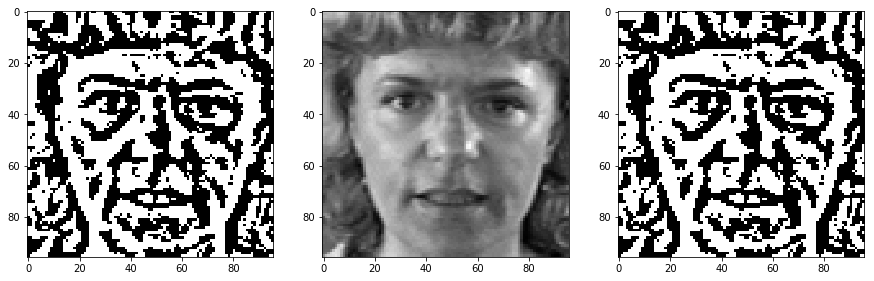

In [163]:
import scipy.misc
#Applying an adaptive filter (considers a 9x9 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
def render(img):
    im = scipy.misc.toimage(img.reshape(96,96))
    im.save("foobar.png")
    src = cv2.imread("foobar.png", 0)
    img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
    return(img_edge)

#starts the timer
start_time = time.time()


df_train_trans2 = np.empty([6849,9216])
#apply transformation
for i in range(0,6849):
    #pick an image to mess with
    img = df_team_train2[i].reshape(96,96)
    #call function
    result = render(img)
    df_train_trans2[i] = result.reshape(1, 9216)
   # print (df_train_trans[i])
#mini_train_transformed = mini_train_data.applymap(render)
#mini_train_transformed = np.hstack(mini_train_transformed['Image'].values).T  # scale pixel values to [0, 1]#T transposes the col

#stop timer
end_time = time.time()
run_time = time.strftime("%H:%M:%S",time.gmtime(end_time - start_time))
print (' run time (H:M:S) ' + str(run_time))


###########################
#pick an image to mess with
img = df_team_train2[27].reshape(96,96)

#pick an image to mess with and transform it mannually
img_o = df_team_train2[27].reshape(96,96)
#call function
result = render(img_o)

#check transformation
img_trans = df_train_trans2[27].reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,2).imshow(img,cmap='gray')
fig.add_subplot(1,3,1).imshow(img_trans,cmap='gray')
fig.add_subplot(1,3,3).imshow(result,cmap='gray')

In [153]:
df_train_trans2.shape

(6849, 9216)

In [177]:
np.savetxt("AdaptiveFilter9x9.csv",df_train_trans2, delimiter = ",")

Transformation3

 run time (H:M:S) 00:00:15


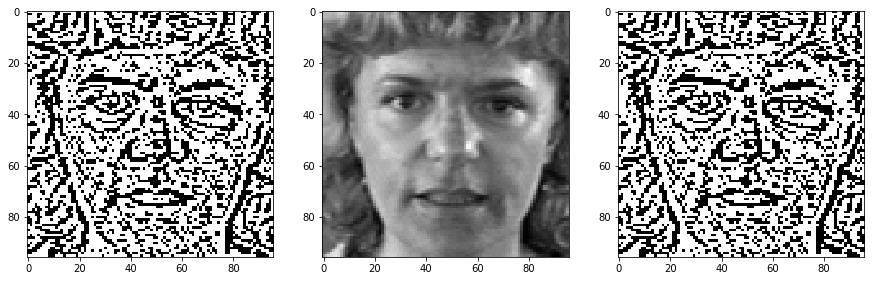

In [164]:
import scipy.misc
#Applying an adaptive filter (considers a 9x9 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
def render(img):
    im = scipy.misc.toimage(img.reshape(96,96))
    im.save("foobar.png")
    src = cv2.imread("foobar.png", 0)
    img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 2)
    return(img_edge)

#starts the timer
start_time = time.time()

df_train_trans3 = np.empty([6849,9216])
#apply transformation
for i in range(0,6849):
    #pick an image to mess with
    img = df_team_train2[i].reshape(96,96)
    #call function
    result = render(img)
    df_train_trans3[i] = result.reshape(1, 9216)
   # print (df_train_trans[i])
#mini_train_transformed = mini_train_data.applymap(render)
#mini_train_transformed = np.hstack(mini_train_transformed['Image'].values).T  # scale pixel values to [0, 1]#T transposes the col

#stop timer
end_time = time.time()
run_time = time.strftime("%H:%M:%S",time.gmtime(end_time - start_time))
print (' run time (H:M:S) ' + str(run_time))


###########################
#pick an image to mess with
img = df_team_train2[27].reshape(96,96)

#pick an image to mess with and transform it mannually
img_o = df_team_train2[27].reshape(96,96)
#call function
result = render(img_o)

#check transformation
img_trans = df_train_trans3[27].reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,2).imshow(img,cmap='gray')
fig.add_subplot(1,3,1).imshow(img_trans,cmap='gray')
fig.add_subplot(1,3,3).imshow(result,cmap='gray')

In [176]:
np.savetxt("AdaptiveFilter3x3.csv",df_train_trans3, delimiter = ",")

## Accuracy after updating to be the same train/dev dataset that was run on the main NN

Original

In [123]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(df_team_train2, df_team_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(df_team_dev2)

#accuracy Calcs
RSME = LR_model.score(df_team_dev2,df_team_dev_labels)
wrong_prediction = (test_predicted_labels != df_team_dev_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -3.79597358665e+20


Transformation 1

In [122]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(df_train_trans, df_team_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(df_team_dev2)

#accuracy Calcs
RSME = LR_model.score(df_team_dev2,df_team_dev_labels)
wrong_prediction = (test_predicted_labels != df_team_dev_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -2.06830726641e+28


Transformation 2

In [166]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(df_train_trans2, df_team_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(df_team_dev2)

#accuracy Calcs
RSME = LR_model.score(df_team_dev2,df_team_dev_labels)
wrong_prediction = (test_predicted_labels != df_team_dev_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -3.75428866581e+19


Transformation 3

In [165]:
from sklearn.linear_model import LinearRegression
#builds model
LR_model = LinearRegression()
LR_model.fit(df_train_trans3, df_team_train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(df_team_dev2)

#accuracy Calcs
RSME = LR_model.score(df_team_dev2,df_team_dev_labels)
wrong_prediction = (test_predicted_labels != df_team_dev_labels)
print ("Regularization weight: " + str(RSME))

Regularization weight: -1.49713805994e+23


In [ ]:
#code from https://github.com/ResidentMario/missingno
# usded to make missing values eda
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

__version__ = "0.3.8"


def _ascending_sort(df):
    """
    Helper method for sorting.
    Returns a DataFrame whose values have been rearranged by ascending completeness.
    """
    return df.iloc[np.argsort(df.count(axis='columns').values), :]


def _descending_sort(df):
    """
    Helper method for sorting.
    Returns a DataFrame whose values have been rearranged by descending completeness.
    """
    return df.iloc[np.flipud(np.argsort(df.count(axis='columns').values)), :]


def nullity_sort(df, sort=None):
    """
    Sorts a DataFrame according to its nullity, in either ascending or descending order.
    :param df: The DataFrame object being sorted.
    :param sort: The sorting method: either "ascending", "descending", or None (default).
    :return: The nullity-sorted DataFrame.
    """
    _df = df
    if sort == "ascending":
        _df = _ascending_sort(df)
    elif sort == "descending":
        _df = _descending_sort(df)
    return _df


def _n_top_complete_filter(df, n):
    """
    Helper method for filtering a DataFrame.
    Returns the top n most populated entry columns.
    """
    return df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[-n:])]


def _n_bottom_complete_filter(df, n):
    """
    Helper method for filtering a DataFrame.
    Returns the bottom n least populated entry columns.
    """
    return df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[:n])]


def _p_top_complete_filter(df, p):
    """
    Helper method for filtering a DataFrame.
    Returns the entry columns which are at least p*100 percent completeness.
    """
    return df.iloc[:, [c >= p for c in df.count(axis='rows').values / len(df)]]


def _p_bottom_complete_filter(df, p):
    """
    Helper method for filtering a DataFrame.
    Returns the entry columns which are at most p*100 percent completeness.
    """
    return df.iloc[:, [c <= p for c in df.count(axis='rows').values / len(df)]]


def nullity_filter(df, filter=None, p=0, n=0):
    """
    Filters a DataFrame according to its nullity, using some combination of 'top' and 'bottom' numerical and
    percentage values. Percentages and numerical thresholds can be specified simultaneously: for example,
    to get a DataFrame with columns of at least 75% completeness but with no more than 5 columns, use
    `nullity_filter(df, filter='top', p=.75, n=5)`.
    :param df: The DataFrame whose columns are being filtered.
    :param filter: The orientation of the filter being applied to the DataFrame. One of, "top", "bottom",
    or None (default). The filter will simply return the DataFrame if you leave the filter argument unspecified or
    as None.
    :param p: A completeness ratio cut-off. If non-zero the filter will limit the DataFrame to columns with at least p
    completeness. Input should be in the range [0, 1].
    :param n: A numerical cut-off. If non-zero no more than this number of columns will be returned.
    :return: The nullity-filtered `DataFrame`.
    """
    _df = df
    if filter == "top":
        if p:
            _df = _p_top_complete_filter(_df, p)
        if n:
            _df = _n_top_complete_filter(_df, n)
    elif filter == "bottom":
        if p:
            _df = _p_bottom_complete_filter(_df, p)
        if n:
            _df = _n_bottom_complete_filter(_df, n)
    return _df


def matrix(df,
           filter=None, n=0, p=0, sort=None,
           figsize=(25, 10), width_ratios=(15, 1), color=(0.25, 0.25, 0.25),
           fontsize=16, labels=None, sparkline=True, inline=True,
           freq=None):
    """
    Presents a `matplotlib` matrix visualization of the nullity of the given DataFrame.
    Note that for the default `figsize` 250 is a soft display limit: specifying a number of records greater than
    approximately this value will cause certain records to show up in the sparkline but not in the matrix, which can
    be confusing.
    The default vertical display will fit up to 50 columns. If more than 50 columns are specified and the labels
    parameter is left unspecified the visualization will automatically drop the labels as they will not be very
    readable. You can override this behavior using `labels=True` and your own `fontsize` parameter.
    :param df: The DataFrame whose completeness is being nullity matrix mapped.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter.
    For the vertical configuration this defaults to (20, 10); the horizontal configuration computes a sliding value
    by default based on the number of columns that need to be displayed.
    :param fontsize: The figure's font size. This default to 16.
    :param labels: Whether or not to display the column names. Would need to be turned off on particularly large
    displays. Defaults to True.
    :param sparkline: Whether or not to display the sparkline. Defaults to True.
    :param width_ratios: The ratio of the width of the matrix to the width of the sparkline. Defaults to `(15,
    1)`. Does nothing if `sparkline=False`.
    :param color: The color of the filled columns. Default is a medium dark gray: the RGB multiple `(0.25, 0.25, 0.25)`.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """

    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    height = df.shape[0]
    width = df.shape[1]

    # z is the color-mask array.
    z = df.notnull().values

    # g is a NxNx3 matrix
    g = np.zeros((height, width, 3))

    # Apply the z color-mask to set the RGB of each pixel.
    g[z < 0.5] = [1, 1, 1]
    g[z > 0.5] = color

    # Set up the matplotlib grid layout.
    # If the sparkline is removed the layout is a unary subplot.
    # If the sparkline is included the layout is a left-right subplot.
    fig = plt.figure(figsize=figsize)
    if sparkline:
        gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios)
        gs.update(wspace=0.08)
        ax1 = plt.subplot(gs[1])
    else:
        gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Create the nullity plot.
    ax0.imshow(g, interpolation='none')

    # Remove extraneous default visual elements.
    ax0.set_aspect('auto')
    ax0.grid(b=False)
    ax0.xaxis.tick_top()
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['left'].set_visible(False)

    # Set up and rotate the column ticks.
    # The labels argument is set to None by default. If the user specifies it in the argument,
    # respect that specification. Otherwise display for <= 50 columns and do not display for > 50.
    if labels or (labels is None and len(df.columns) <= 50):
        ha = 'left'
        ax0.set_xticks(list(range(0, width)))
        ax0.set_xticklabels(list(df.columns), rotation=45, ha=ha, fontsize=fontsize)
    else:
        ax0.set_xticks([])

    # Adds Timestamps ticks if freq is not None,
    # else sets up the two top-bottom row ticks.
    if freq:
        ts_list = []

        if type(df.index) == pd.PeriodIndex:
            ts_array = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))

        elif type(df.index) == pd.DatetimeIndex:
            ts_array = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))
        else:
            raise KeyError("Dataframe index must be PeriodIndex or DatetimeIndex.")
        try:
            for value in ts_array:
                ts_list.append(df.index.get_loc(value))
        except KeyError:
            raise KeyError("Could not divide time index into desired frequency.")

        ax0.set_yticks(ts_list)
        ax0.set_yticklabels(ts_ticks, fontsize=20, rotation=0)
    else:
        ax0.set_yticks([0, df.shape[0] - 1])
        ax0.set_yticklabels([1, df.shape[0]], fontsize=20, rotation=0)

    # Create the inter-column vertical grid.
    in_between_point = [x + 0.5 for x in range(0, width - 1)]
    for in_between_point in in_between_point:
        ax0.axvline(in_between_point, linestyle='-', color='white')

    if sparkline:
        # Calculate row-wise completeness for the sparkline.
        completeness_srs = df.notnull().astype(bool).sum(axis=1)
        x_domain = list(range(0, height))
        y_range = list(reversed(completeness_srs.values))
        min_completeness = min(y_range)
        max_completeness = max(y_range)
        min_completeness_index = y_range.index(min_completeness)
        max_completeness_index = y_range.index(max_completeness)

        # Set up the sparkline.
        ax1.grid(b=False)
        ax1.set_aspect('auto')
        # set_facecolor in mpl >= 2.0.0, set_axis_bgcolor in mpl < 2.0.0
        # GH 25
        if int(mpl.__version__[0]) <= 1:
            ax1.set_axis_bgcolor((1, 1, 1))
        else:
            ax1.set_facecolor((1, 1, 1))
        # Remove the black border.
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        # Set y-margin to 0.
        ax1.set_ymargin(0)

        # Plot sparkline---plot is sideways so the x and y axis are reversed.
        ax1.plot(y_range, x_domain, color=color)

        if labels:
            # Figure out what case to display the label in: mixed, upper, lower.
            label = 'Data Completeness'
            if df.columns[0].islower():
                label = label.lower()
            if df.columns[0].isupper():
                label = label.upper()

            # Set up and rotate the sparkline label.
            ha = 'left'
            ax1.set_xticks([min_completeness + (max_completeness - min_completeness) / 2])
            ax1.set_xticklabels([label], rotation=45, ha=ha, fontsize=fontsize)
            ax1.xaxis.tick_top()
            ax1.set_yticks([])
        else:
            ax1.set_xticks([])
            ax1.set_yticks([])

        # Add maximum and minimum labels.
        ax1.annotate(max_completeness,
                     xy=(max_completeness, max_completeness_index),
                     xytext=(max_completeness + 2, max_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='left')
        ax1.annotate(min_completeness,
                     xy=(min_completeness, min_completeness_index),
                     xytext=(min_completeness - 2, min_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='right')

        # Add maximum and minimum circles.
        ax1.set_xlim([min_completeness - 2, max_completeness + 2])  # Otherwise the circles are cut off.
        ax1.plot([min_completeness], [min_completeness_index], '.', color=color, markersize=10.0)
        ax1.plot([max_completeness], [max_completeness_index], '.', color=color, markersize=10.0)

        # Remove tick mark (only works after plotting).
        ax1.xaxis.set_ticks_position('none')

    # Plot if inline, return the figure if not.
    if inline:
        plt.show()
    else:
        return fig


def heatmap(df, inline=True,
            filter=None, n=0, p=0, sort=None,
            figsize=(20, 12), fontsize=16, labels=True, cmap='RdBu'
            ):
    """
    Presents a `seaborn` heatmap visualization of nullity correlation in the given DataFrame.
    
    Note that this visualization has no special support for large datasets. For those, try the dendrogram instead.
    
    :param df: The DataFrame whose completeness is being heatmapped.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to (20, 12).
    :param fontsize: The figure's font size.
    :param labels: Whether or not to label each matrix entry with its correlation (default is True).
    :param cmap: What `matplotlib` colormap to use. Defaults to `RdBu`.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    # Set up the figure.
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Pre-processing: remove completely filled or completely empty variables.
    df = df.iloc[:,[i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]

    # Create and mask the correlation matrix.
    corr_mat = df.isnull().corr()
    # corr_mat = corr_mat.replace(np.nan, 1)
    # corr_mat[np.isnan(corr_mat)] = 0
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True

    # Set fontsize.
    # fontsize = _set_font_size(fig, df, fontsize)

    # Construct the base heatmap.
    if labels:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False,
                    annot=True, annot_kws={"size": fontsize - 2})
    else:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False)

    # Apply visual corrections and modifications.
    ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=45, ha='left', fontsize=fontsize)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), fontsize=fontsize, rotation=0)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0, fontsize=fontsize)

    ax0.xaxis.tick_top()
    ax0.patch.set_visible(False)

    # Fix up annotation label rendering.
    for text in ax0.texts:
        t = float(text.get_text())
        if 0.95 <= t < 1:
            text.set_text("<1")
        elif -1 < t <= -0.95:
            text.set_text(">-1")
        elif t == 1:
            text.set_text("1")
        elif t == -1:
            text.set_text("-1")
        elif -0.05 < t < 0.05:
            text.set_text("")
        else:
            text.set_text(round(t, 1))

    if inline:
        plt.show()
    else:
        return fig


def _calculate_geographic_nullity(geo_group, x_col, y_col):
    """
    Helper method which calculates the nullity of a DataFrame. Factored out of and used within `geoplot`.
    """
    # Aggregate by point and fetch a list of non-null coordinate pairs, which is returned.
    point_groups = geo_group.groupby([x_col, y_col])
    points = [point for point in point_groups.groups.keys() if pd.notnull(point[0]) and pd.notnull(point[1])]
    # Calculate nullities by location, then take their average within the overall feature.
    counts = np.sum(point_groups.count().values, axis=1)
    entries = point_groups.size()
    width = len(geo_group.columns)
    # Remove empty (NaN, NaN) points.
    if len(entries) > 0:  # explicit check to avoid a Runtime Warning
        geographic_nullity = np.average(1 - counts / width / entries)
        return points, geographic_nullity
    else:
        return points, np.nan


def geoplot(df, x=None, y=None, coordinates=None, by=None, geometry=None, cutoff=None, histogram=False,
            figsize=(25, 10), fontsize=8, inline=True):
    """
    Generates a geographical data nullity heatmap, which shows the distribution of missing data across geographic
    regions. The precise output depends on the inputs provided. In increasing order of usefulness:
    *   If no geographical context is provided, a quadtree is computed and nullities are rendered as abstract
        geopgrahical squares.
    *   If geographical context is provided in the form of a column of geographies (region, borough. ZIP code,
        etc.) in the `DataFrame`, convex hulls are computed for each of the point groups and the heatmap is generated
        within them.
    *   If geographical context is provided *and* a separate geometry is provided, a heatmap is generated for each
        point group within this geograpby instead.
    :param df: The DataFrame whose completeness is being mapped.
    :param x: The x variable: probably a coordinate (longitude), possibly some other floating point value. May be a
    string (pointing to a column of df) or an iterable.
    :param y: The y variable: probably a coordinate (latitude), possibly some other floating point value. May be a
    string (pointing to a column of df) or an iterable.
    :param coordinates: A coordinate tuple iterable, or column thereof in the given DataFrame. One of x AND y OR
    coordinates must be specified, but not both.
    :param by: If you would like to aggregate your geometry by some geospatial attribute of the underlying DataFrame,
    name that column here.
    :param geometry: If you would like to provide your own geometries for your aggregation, instead of relying on
    (functional, but not pretty) convex hulls, provide them here. This parameter is expected to be a dict or Series
    of `shapely.Polygon` or `shapely.MultiPolygon` objects. It's ignored if `by` is not specified.
    :param cutoff: If no aggregation is specified, this parameter sets the minimum number of observations to include in
    each square. If not provided, set to 50 or 5% of the total size of the dataset, whichever is smaller. If `by` is
    specified this parameter is ignored.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to (25, 10).
    :param histogram: Whether or not to plot a histogram of data distributions below the map. Defaults to False.
    :param fontsize: If `hist` is specified, this parameter specifies the size of the tick labels. Ignored if `hist`
    is not specified. Defaults to 8.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    import shapely.geometry
    import descartes
    import matplotlib.cm
    # We produce a coordinate column in-place in a function-local copy of the `DataFrame`.
    # This seems specious, and sort of is, but is necessary because the internal `pandas` aggregation methods
    # (`pd.core.groupby.DataFrameGroupBy.count` specifically) are optimized to run two orders of magnitude faster than
    # user-defined external `groupby` operations. For example:
    # >>> %time df.head(100000).groupby(lambda ind: df.iloc[ind]['LOCATION']).count()
    # Wall time: 12.7 s
    # >>> %time df.head(100000).groupby('LOCATION').count()
    # Wall time: 96 ms
    x_col = '__x'
    y_col = '__y'
    if x and y:
        if isinstance(x, str) and isinstance(y, str):
            x_col = x
            y_col = y
        else:
            df['__x'] = x
            df['__y'] = y
    elif coordinates:
        if isinstance(coordinates, str):
            # Quick conversion to enable fancy numpy indexing. This allows fast operations like `df[coord_col][0,...]`
            coord_col = np.array([np.array(e) if pd.notnull(e) else np.array(np.nan, np.nan) for e in df[coordinates]])
            df['__x'] = coord_col[:, 0]
            df['__y'] = coord_col[:, 1]
        else:
            # cf. Above.
            coord_col = np.array([np.array(e) for e in coordinates])
            df['__x'] = coord_col[:, 0]
            df['__y'] = coord_col[:, 1]
    else:
        raise IndexError("x AND y OR coordinates parameters expected.")

    # Set the cutoff variable.
    if cutoff is None: cutoff = np.min([50, 0.05 * len(df)])

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(111)

    # In case we're given something to categorize by, use that.
    if by:
        nullity_dict = dict()
        # This loop calculates and stores geographic feature averages and their polygons.
        for identifier, geo_group in df.groupby(by):  # ex. ('BRONX', <pd.DataFrame with 10511 objects>)
            # A single observation in the group will produce a `Point` hull, while two observations in the group
            # will produce a `LineString` hull. Neither of these is desired, nor accepted by `PatchCollection`
            # further on. So we remove these cases by filtering them (1) before and (2) after aggregation steps.
            # cf. http://toblerity.org/shapely/manual.html#object.convex_hull
            if not len(geo_group) > 2:
                continue

            # The following subroutine groups `geo_group` by `x_col` and `y_col`, and calculates and returns
            # a list of points in the group (`points`) as well as its overall nullity (`geographic_nullity`).
            points, geographic_nullity = _calculate_geographic_nullity(geo_group, x_col, y_col)

            # If thinning the points, above, reduced us below the threshold for a proper polygonal hull (See the
            # note at the beginning of thos loop), stop here.
            if not len(points) > 2:
                continue

            # If no geometry is provided, calculate and store the hulls and averages.
            if geometry is None:
                    hull = shapely.geometry.MultiPoint(points).convex_hull
                    nullity_dict[identifier] = {'nullity': geographic_nullity, 'shapes': [hull]}

            # If geometry is provided, use that instead.
            else:
                geom = geometry[identifier]
                polygons = []
                # Valid polygons are simple polygons (`shapely.geometry.Polygon`) and complex multi-piece polygons
                # (`shapely.geometry.MultiPolygon`). The latter is an iterable of its components, so if the shape is
                # a `MultiPolygon`, append it as that list. Otherwise if the shape is a basic `Polygon`,
                # append a list with one element, the `Polygon` itself.
                if isinstance(geom, shapely.geometry.MultiPolygon):
                    polygons = shapely.ops.cascaded_union([p for p in geometry])
                else:  # shapely.geometry.Polygon
                    polygons = [geom]
                nullity_dict[identifier] = {'nullity': geographic_nullity, 'shapes': polygons}

        # Prepare a colormap.
        nullities = [nullity_dict[key]['nullity'] for key in nullity_dict.keys()]
        colors = matplotlib.cm.YlOrRd(plt.Normalize(0, 1)(nullities))

        # Now we draw.
        for i, polygons in enumerate([(nullity_dict[key]['shapes']) for key in nullity_dict.keys()]):
            for polygon in polygons:
                ax.add_patch(descartes.PolygonPatch(polygon, fc=colors[i], ec='white', alpha=0.8, zorder=4))
        ax.axis('equal')

        # Remove extraneous plotting elements.
        ax.grid(b=False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.patch.set_visible(False)

    # In case we aren't given something to categorize by, we choose a spatial representation that's reasonably
    # efficient and informative: quadtree rectangles.
    # Note: SVD could perhaps be applied to the axes to discover point orientation and realign the grid to match
    # that, but I'm uncertain that this computationally acceptable and, in the case of comparisons, even a good
    # design choice. Perhaps this could be implemented at a later date.
    else:
        df = df[(pd.notnull(df[x_col])) & (pd.notnull(df[y_col]))]
        min_x, max_x = df[x_col].min(), df[x_col].max()
        min_y, max_y = df[y_col].min(), df[y_col].max()

        rectangles = []

        # Recursive quadtree. This subroutine, when, builds a dictionary of squares, stored by tuples keyed with
        # (min_x, max_x, min_y, max_y), whose values are the nullity of squares containing less than 100 observations.
        def squarify(_min_x, _max_x, _min_y, _max_y, df):
            arr = df[[x_col, y_col]].values
            points_inside = df[(_min_x < arr[:,0]) &
                               (arr[:,0] < _max_x) &
                               (_min_y < arr[:,1]) &
                               (arr[:,1] < _max_y)]
            if len(points_inside) < cutoff:
                # The following subroutine groups `geo_group` by `x_col` and `y_col`, and calculates and returns
                # a list of points in the group (`points`) as well as its overall nullity (`geographic_nullity`). The
                # first of these calculations is ignored.
                _, square_nullity = _calculate_geographic_nullity(points_inside, x_col, y_col)
                rectangles.append(((_min_x, _max_x,_min_y, _max_y), square_nullity))
            else:
                _mid_x, _mid_y = (_min_x + _max_x) / 2, (_min_y + _max_y) / 2
                squarify(_min_x, _mid_x, _mid_y, _max_y, points_inside)
                squarify(_min_x, _mid_x, _min_y, _mid_y, points_inside)
                squarify(_mid_x, _max_x, _mid_y, _max_y, points_inside)
                squarify(_mid_x, _max_x, _min_y, _mid_y, points_inside)

        # Populate the `squares` array, per the above.
        squarify(min_x, max_x, min_y, max_y, df)

        # Prepare a colormap.
        # Many of the squares at the bottom of the quadtree will be inputted into the colormap as NaN values,
        # which matplotlib will map over as minimal values. We of course don't want that, so we pull the bottom out
        # of it.
        nullities = [nullity for _, nullity in rectangles]
        cmap = matplotlib.cm.YlOrRd
        colors = [cmap(n) if pd.notnull(n) else [1,1,1,1]
                  for n in plt.Normalize(0, 1)(nullities)]

        # Now we draw.
        for i, ((min_x, max_x, min_y, max_y), _) in enumerate(rectangles):
            square = shapely.geometry.Polygon([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])
            ax.add_patch(descartes.PolygonPatch(square, fc=colors[i], ec='white', alpha=1, zorder=4))
        ax.axis('equal')

        # Remove extraneous plotting elements.
        ax.grid(b=False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.patch.set_visible(False)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.patch.set_visible(False)

    if histogram:
        # Add a histogram.
        sns.set_style(None)
        nonnan_nullities = [n for n in nullities if pd.notnull(n)]
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="25%", pad=0.00)
        sns.distplot(pd.Series(nonnan_nullities), ax=cax, color=list(np.average(colors, axis=0)))

        cax.grid(b=False)
        # cax.get_xaxis().set_visible(False)
        cax.get_yaxis().set_visible(False)
        cax.patch.set_visible(False)
        cax.xaxis.set_ticks_position('none')
        cax.yaxis.set_ticks_position('none')
        cax.spines['top'].set_visible(False)
        cax.spines['right'].set_visible(False)
        cax.spines['bottom'].set_visible(False)
        cax.spines['left'].set_visible(False)
        cax.patch.set_visible(False)
        cax.tick_params(labelsize=fontsize)

    # Display.
    # Display.
    if inline:
        plt.show()
    else:
        return fig